This Notebook tests (and provides examples) of the different features in the bioscrape.lineages

1. All Types of Volume Events are tested below

Simulating Model 1
Simulating Model 2
Simulating Model 3


C:\Users\wp_ix\Miniconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Creating New Volume event
	type=linear volume
	params={'growth_rate': 0.5}
	prop_type=massaction
	prop_params={'k': 0.1, 'species': 'X'}
C:\Users\wp_ix\Miniconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Creating Propensity: prop_type=massaction params={'k': 0.1, 'species': 'X'}


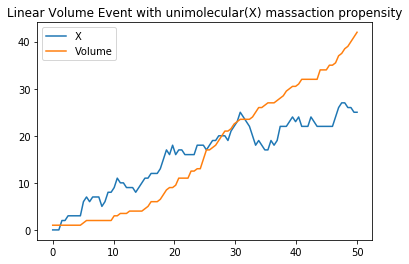

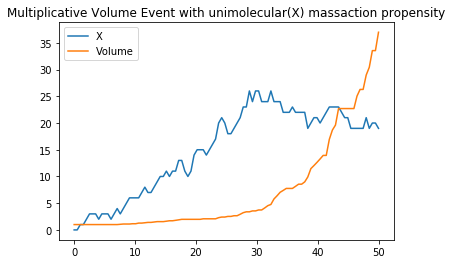

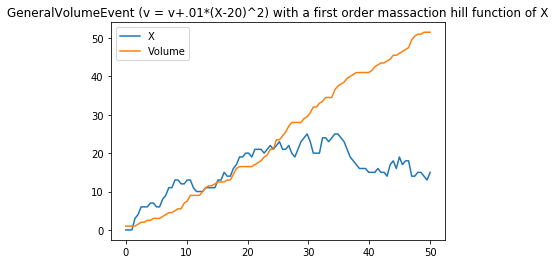

In [1]:
%matplotlib inline

from bioscrape.lineage import LineageModel
from bioscrape.types import Model
from bioscrape.lineage import LineageSSASimulator
from bioscrape.lineage import LineageCSimInterface
from bioscrape.lineage import LineageVolumeCellState
import numpy as np
import pylab as plt

ssa_simulator = LineageSSASimulator()
timepoints = np.linspace(0,50,100)

k = 1
d = .1
g = .5
rxn1 = (["A"], ["A", "X"], "massaction", {"k":k})
rxn2 = (["X"], [], "massaction", {"k":d})
rxns = [rxn1, rxn2]
LM1 = LineageModel(reactions = rxns, initialize_model = True, initial_condition_dict = {"X": 0, "A":2})
LM1.create_volume_event("linear volume", {"growth_rate":g}, "massaction", {"k":.1, "species":"X"}, print_out = True)
LM1.py_initialize()

print("Simulating Model 1")
stoch_result = ssa_simulator.py_SimulateSingleCell(timepoints, Model = LM1)
stoch_sim_output = stoch_result.py_get_result()

X_ind = LM1.get_species_index('X')
volume = stoch_result.py_get_volume()


plt.figure()
plt.title("Linear Volume Event with unimolecular(X) massaction propensity")
plt.plot(timepoints, stoch_sim_output[:, X_ind], label = "X")
plt.plot(timepoints, volume, label = "Volume")
plt.legend()

LM2 = LineageModel(reactions = rxns, initialize_model = True, initial_condition_dict = {"X": 0, "A":2})
LM2.create_volume_event("multiplicative", {"growth_rate":g/10}, "massaction", {"k":.1, "species":"X"}, print_out = False)
LM2.py_initialize()

print("Simulating Model 2")
stoch_result = ssa_simulator.py_SimulateSingleCell(timepoints, Model = LM2)
stoch_sim_output = stoch_result.py_get_result()

X_ind = LM2.get_species_index('X')
volume = stoch_result.py_get_volume()

plt.figure()
plt.title("Multiplicative Volume Event with unimolecular(X) massaction propensity")
plt.plot(timepoints, stoch_sim_output[:, X_ind], label = "X")
plt.plot(timepoints, volume, label = "Volume")
plt.legend()

LM3 = LineageModel(reactions = rxns, initialize_model = False, initial_condition_dict = {"X": 0, "A":2})
LM3.create_volume_event("general", {"equation": "volume+"+".01*(X-20)^2"}, "massaction", {"k":.1, "species":"X"})
LM3.py_initialize()

print("Simulating Model 3")
stoch_result = ssa_simulator.py_SimulateSingleCell(timepoints, Model = LM1)
stoch_sim_output = stoch_result.py_get_result()

X_ind = LM3.get_species_index('X')
volume = stoch_result.py_get_volume()

plt.figure()
plt.title("GeneralVolumeEvent (v = v+.01*(X-20)^2) with a first order massaction hill function of X")
plt.plot(timepoints, stoch_sim_output[:, X_ind], label = "X")
plt.plot(timepoints, volume, label = "Volume")
plt.legend()

2. All types of Volume Rules are test below

Simulating Model 1
Simulating Model 2
Simulating Model 3
Simulating Model 4


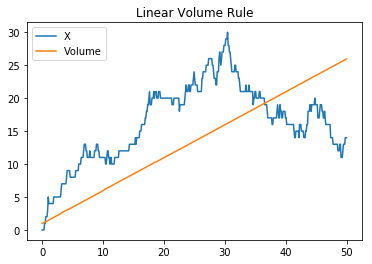

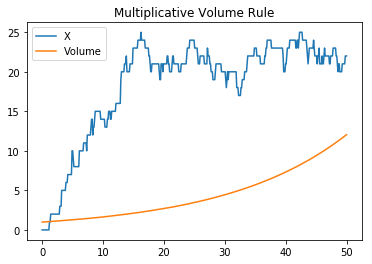

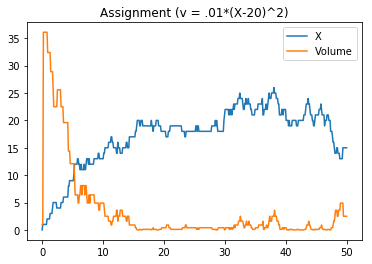

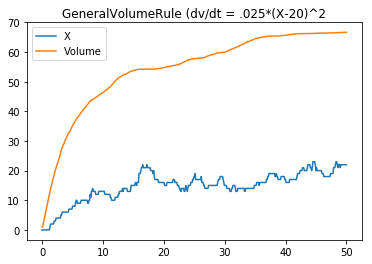

In [2]:
%matplotlib inline

from bioscrape.lineage import LineageModel
from bioscrape.types import Model
from bioscrape.lineage import LineageSSASimulator
from bioscrape.lineage import LineageCSimInterface
from bioscrape.lineage import LineageVolumeCellState
import numpy as np
import pylab as plt

ssa_simulator = LineageSSASimulator()
timepoints = np.linspace(0,50,500)

k = 1
d = .1
g = .5
rxn1 = (["A"], ["A", "X"], "massaction", {"k":k})
rxn2 = (["X"], [], "massaction", {"k":d})
rxns = [rxn1, rxn2]
LM1 = LineageModel(reactions = rxns, initialize_model = True, initial_condition_dict = {"X": 0, "A":2})
LM1.create_volume_rule("linear", {"growth_rate":g})
LM1.py_initialize()

print("Simulating Model 1")
stoch_result = ssa_simulator.py_SimulateSingleCell(timepoints, Model = LM1)
stoch_sim_output = stoch_result.py_get_result()

X_ind = LM1.get_species_index('X')
volume = stoch_result.py_get_volume()


plt.figure()
plt.title("Linear Volume Rule")
plt.plot(timepoints, stoch_sim_output[:, X_ind], label = "X")
plt.plot(timepoints, volume, label = "Volume")
plt.legend()

LM2 = LineageModel(reactions = rxns, initialize_model = True, initial_condition_dict = {"X": 0, "A":2})
LM2.create_volume_rule("multiplicative", {"growth_rate":(g/10.)})
LM2.py_initialize()


print("Simulating Model 2")
stoch_result = ssa_simulator.py_SimulateSingleCell(timepoints, Model = LM2)
stoch_sim_output = stoch_result.py_get_result()

X_ind = LM2.get_species_index('X')
volume = stoch_result.py_get_volume()

plt.figure()
plt.title("Multiplicative Volume Rule")
plt.plot(timepoints, stoch_sim_output[:, X_ind], label = "X")
plt.plot(timepoints, volume, label = "Volume")
plt.legend()

LM3 = LineageModel(reactions = rxns, initialize_model = False, initial_condition_dict = {"X": 0, "A":2})
LM3.create_volume_rule("assignment", {"equation": ".1*(X-20)^2"})
LM3.py_initialize()

print("Simulating Model 3")
stoch_result = ssa_simulator.py_SimulateSingleCell(timepoints, Model = LM3)
stoch_sim_output = stoch_result.py_get_result()

X_ind = LM3.get_species_index('X')
volume = stoch_result.py_get_volume()

plt.figure()
plt.title("Assignment (v = .01*(X-20)^2)")
plt.plot(timepoints, stoch_sim_output[:, X_ind], label = "X")
plt.plot(timepoints, volume, label = "Volume")
plt.legend()


LM4 = LineageModel(reactions = rxns, initialize_model = False, initial_condition_dict = {"X": 0, "A":2})
LM4.create_volume_rule("ode", {"equation": ".025*(X-20)^2"})
LM4.py_initialize()


print("Simulating Model 4")
stoch_result = ssa_simulator.py_SimulateSingleCell(timepoints, Model = LM4)
stoch_sim_output = stoch_result.py_get_result()

X_ind = LM4.get_species_index('X')
volume = stoch_result.py_get_volume()

plt.figure()
plt.title("GeneralVolumeRule (dv/dt = .025*(X-20)^2")
plt.plot(timepoints, stoch_sim_output[:, X_ind], label = "X")
plt.plot(timepoints, volume, label = "Volume")
plt.legend()

3. Death and Division Events (in a Single Cell Simulation) are tested below. When a death/division event occurs, the simulation should stop. These two events both use a positive hill function with the same underlying CRN, so the death and division plots should look similar.


('Adding New DivisionEvent with event_type=', 'division', 'params=', {}, 'propensity_type=', 'hillpositive', 'propensity_params=', {'s1': 'X', 'k': 0.5, 'n': 2, 'K': 15}, 'and VolumeSplitter=', <bioscrape.simulator.VolumeSplitter object at 0x00000273299FAB70>)


C:\Users\wp_ix\Miniconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: The follow species are uninitialized and their value has defaulted to 0: A, X, 
C:\Users\wp_ix\Miniconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Creating Propensity: prop_type=hillpositive params={'s1': 'X', 'k': 0.5, 'n': 2, 'K': 15}
C:\Users\wp_ix\Miniconda3\lib\site-packages\ipykernel_launcher.py:53: UserWarning: The follow species are uninitialized and their value has defaulted to 0: A, X, 


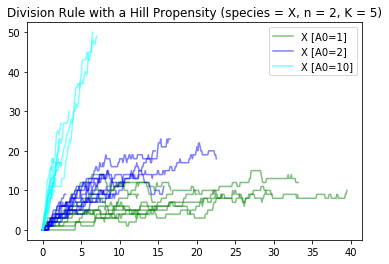

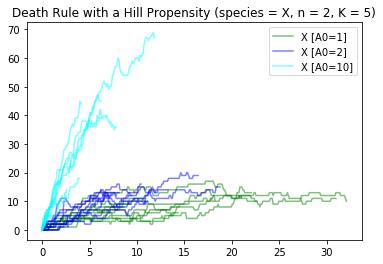

In [3]:
%matplotlib inline

from bioscrape.lineage import LineageModel
from bioscrape.types import Model
from bioscrape.lineage import LineageSSASimulator
from bioscrape.lineage import LineageCSimInterface
from bioscrape.lineage import LineageVolumeCellState
from bioscrape.simulator import VolumeSplitter
import numpy as np
import pylab as plt

ssa_simulator = LineageSSASimulator()
timepoints = np.linspace(0,50,500)
plt.figure()
trials = 10
color_list = ["green", "blue", "cyan"]
k = 1
d = .1
g = .5
rxn1 = (["A"], ["A", "X"], "massaction", {"k":k})
rxn2 = (["X"], [], "massaction", {"k":d})
rxns = [rxn1, rxn2]

LM1 = LineageModel(reactions = rxns, initialize_model = True)
vs = VolumeSplitter()
LM1.create_division_event("division", {}, "hillpositive", {"s1":"X", "k":.5, "n":2, "K":15}, vs, print_out = True)
LM1.py_initialize()
    
for ind in range(3):
    A0 = [1, 2, 10][ind]
    initial_condition_dict = {"X": 0, "A":A0}
    LM1.set_species(initial_condition_dict)
    s = LineageCSimInterface(LM1)
    for trial in range(trials):
        #raise RuntimeError()

        stoch_result = ssa_simulator.py_SimulateSingleCell(timepoints, Model = LM1)
        stoch_sim_output = stoch_result.py_get_result()

        X_ind = LM1.get_species_index('X')
        volume = stoch_result.py_get_volume()
        output_length = stoch_sim_output[:, X_ind].shape[0]
        
        if trial == 0:
            plt.plot(timepoints[:output_length], stoch_sim_output[:, X_ind], label = "X [A0="+str(A0)+"]", color = color_list[ind], alpha = .5)
        else:
            plt.plot(timepoints[:output_length], stoch_sim_output[:, X_ind], color = color_list[ind], alpha = .5)

plt.title("Division Rule with a Hill Propensity (species = X, n = 2, K = 5)")
plt.legend()


LM2 = LineageModel(reactions = rxns, initialize_model = True)
vs = VolumeSplitter()
LM2.create_death_event("death", {}, "hillpositive", {"s1":"X", "k":.5, "n":2, "K":15})
LM2.py_initialize()
plt.figure()
for ind in range(3):
    A0 = [1, 2, 10][ind]
    initial_condition_dict = {"X": 0, "A":A0}
    LM2.set_species(initial_condition_dict)
    s = LineageCSimInterface(LM2)
    for trial in range(trials):
        s.py_set_initial_time(0)
        v = LineageVolumeCellState(v0 = 1, t0 = 0)
        stoch_result = ssa_simulator.py_SimulateSingleCell(timepoints, Model = LM2)
        stoch_sim_output = stoch_result.py_get_result()

        X_ind = LM2.get_species_index('X')
        volume = stoch_result.py_get_volume()
        output_length = stoch_sim_output[:, X_ind].shape[0]
        
        if trial == 0:
            plt.plot(timepoints[:output_length], stoch_sim_output[:, X_ind], label = "X [A0="+str(A0)+"]", color = color_list[ind], alpha = .5)
        else:
            plt.plot(timepoints[:output_length], stoch_sim_output[:, X_ind], color = color_list[ind], alpha = .5)

plt.title("Death Rule with a Hill Propensity (species = X, n = 2, K = 5)")
plt.legend()

Test all Division Rule Types

<Figure size 432x288 with 0 Axes>

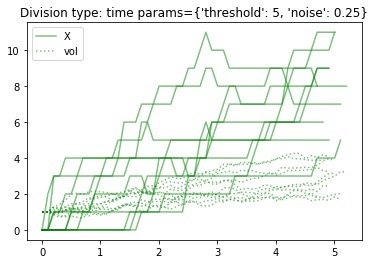

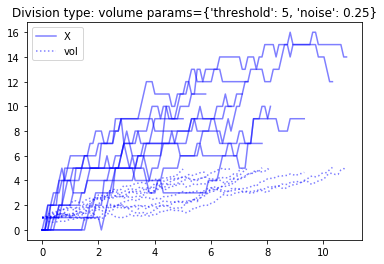

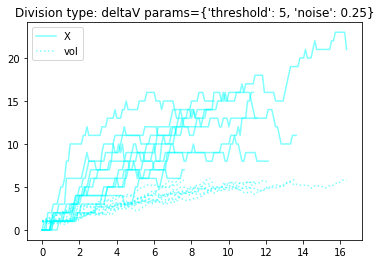

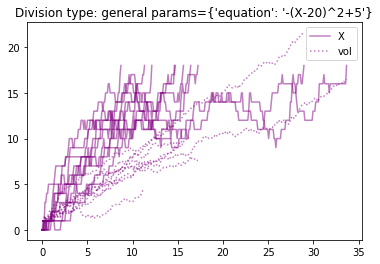

In [7]:
%matplotlib inline

from bioscrape.lineage import LineageModel
from bioscrape.types import Model
from bioscrape.lineage import LineageSSASimulator
from bioscrape.lineage import LineageCSimInterface
from bioscrape.lineage import LineageVolumeCellState
from bioscrape.simulator import VolumeSplitter
import numpy as np
import pylab as plt

ssa_simulator = LineageSSASimulator()
timepoints = np.linspace(0,50,500)
plt.figure()
trials = 10
color_list = ["green", "blue", "cyan", "purple"]
k = 1
d = .1
g = 2.0
rxn1 = (["A"], ["A", "X"], "massaction", {"k":k})
rxn2 = (["X"], [], "massaction", {"k":d})
rxns = [rxn1, rxn2]



noise = .25
g = .5
rules = [("time", {"threshold":5, "noise":noise}), 
 ('volume', {"threshold":5, "noise":noise}), 
 ("deltaV", {"threshold":5, "noise":noise}), 
 ("general",{"equation":"-(X-20)^2+5"})]
for ind in range(4):
    rule_type, rule_dict = rules[ind]
    plt.figure()
    plt.title("Division type: "+str(rule_type)+" params="+str(rule_dict))
    LM1 = LineageModel(reactions = rxns, initialize_model = True, initial_condition_dict = {"X": 0, "A":2})
    vs = VolumeSplitter()
    LM1.create_volume_rule("linear", {"growth_rate":g, 'noise':noise*g*10})
    LM1.create_division_rule(rule_type, rule_dict, vs)
    LM1.py_initialize()
    s = LineageCSimInterface(LM1)
    for trial in range(trials):
        s.py_set_initial_time(0)
        v = LineageVolumeCellState(v0 = 1, t0 = 0)
        
        stoch_result = ssa_simulator.py_SimulateSingleCell(timepoints, Model = LM1)
        stoch_sim_output = stoch_result.py_get_result()

        X_ind = LM1.get_species_index('X')
        volume = stoch_result.py_get_volume()
        output_length = stoch_sim_output[:, X_ind].shape[0]
        
        if trial == 0:
            plt.plot(timepoints[:output_length], stoch_sim_output[:, X_ind], label = "X", color = color_list[ind], alpha = .5)
            plt.plot(timepoints[:output_length], volume,":", label = "vol", color = color_list[ind], alpha = .5)

        else:
            plt.plot(timepoints[:output_length], stoch_sim_output[:, X_ind], color = color_list[ind], alpha = .5)
            plt.plot(timepoints[:output_length], volume, ":", color = color_list[ind], alpha = .5)
    plt.legend()

plt.legend()

Testing All Death Rule Types

C:\Users\wp_ix\Miniconda3\lib\site-packages\ipykernel_launcher.py:37: UserWarning: No comparison time added for SpeciesDeathRule in param dictionary. Defaulting to >.
C:\Users\wp_ix\Miniconda3\lib\site-packages\ipykernel_launcher.py:37: UserWarning: No comparison time added for ParamDeathRule in param dictionary. Defaulting to >.


<Figure size 432x288 with 0 Axes>

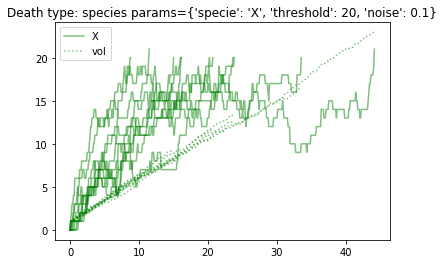

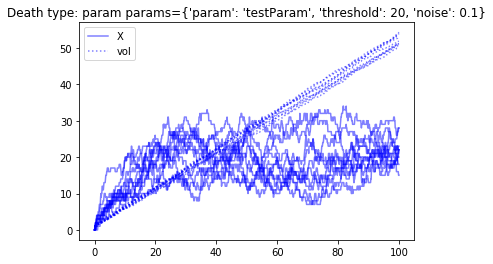

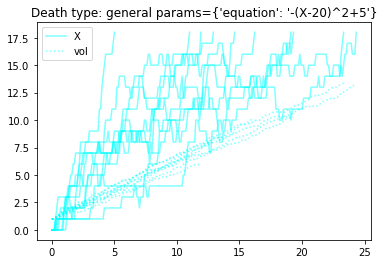

In [8]:
%matplotlib inline

from bioscrape.lineage import LineageModel
from bioscrape.types import Model
from bioscrape.lineage import LineageSSASimulator
from bioscrape.lineage import LineageCSimInterface
from bioscrape.lineage import LineageVolumeCellState
from bioscrape.simulator import VolumeSplitter
import numpy as np
import pylab as plt

ssa_simulator = LineageSSASimulator()
timepoints = np.linspace(0,100,1000)
plt.figure()
trials = 10
color_list = ["green", "blue", "cyan", "purple"]
k = 1
d = .1
g = 2.0
rxn1 = (["A"], ["A", "X"], "massaction", {"k":k})
rxn2 = (["X"], [], "massaction", {"k":d})
rxns = [rxn1, rxn2]



noise = .1
g = .5
rules = [("species", {"specie":"X", "threshold":20, "noise":noise}), 
 ('param', {"param":"testParam", "threshold":20, "noise":noise}), 
 ("general",{"equation":"-(X-20)^2+5"})]
for ind in range(3):
    rule_type, rule_dict = rules[ind]
    plt.figure()
    plt.title("Death type: "+str(rule_type)+" params="+str(rule_dict))
    LM1 = LineageModel(reactions = rxns, initialize_model = True, initial_condition_dict = {"X": 0, "A":2}, parameters = [("testParam", 17)])
    LM1.create_volume_rule("linear", {"growth_rate":g, 'noise':noise*g*10})
    LM1.create_death_rule(rule_type, rule_dict)
    LM1.py_initialize()
    for trial in range(trials):

        stoch_result = ssa_simulator.py_SimulateSingleCell(timepoints, Model = LM1)
        stoch_sim_output = stoch_result.py_get_result()

        X_ind = LM1.get_species_index('X')
        volume = stoch_result.py_get_volume()
        output_length = stoch_sim_output[:, X_ind].shape[0]
        
        if trial == 0:
            plt.plot(timepoints[:output_length], stoch_sim_output[:, X_ind], label = "X", color = color_list[ind], alpha = .5)
            plt.plot(timepoints[:output_length], volume,":", label = "vol", color = color_list[ind], alpha = .5)

        else:
            plt.plot(timepoints[:output_length], stoch_sim_output[:, X_ind], color = color_list[ind], alpha = .5)
            plt.plot(timepoints[:output_length], volume, ":", color = color_list[ind], alpha = .5)
    plt.legend()

plt.legend()